<a href="https://colab.research.google.com/github/leonardoLavagna/TCGA-PRAD/blob/main/DEPM_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DEPM First Project 
# Prostate Adenocarcinoma TCGA-PRAD  



## PART I 
## DATA 
### I.1 Installation of the required libraries and set up

In [1]:
# Execute the following 3 cells if and only if the bioconductor packages needed for this part are not installed. 
# The installation can take some time (in the order of minutes). 
# See https://bioconductor.org for more details. 

if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
BiocManager::install("TCGAbiolinks")

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.16 (BiocManager 1.30.19), R 4.2.2 (2022-10-31)

Installing package(s) 'BiocVersion', 'TCGAbiolinks'

also installing the dependencies ‘plogr’, ‘png’, ‘Biostrings’, ‘bitops’, ‘RSQLite’, ‘KEGGREST’, ‘filelock’, ‘RCurl’, ‘GenomeInfoDbData’, ‘zlibbioc’, ‘matrixStats’, ‘AnnotationDbi’, ‘BiocFileCache’, ‘BiocGenerics’, ‘GenomeInfoDb’, ‘XVector’, ‘Rcpp’, ‘R.oo’, ‘R.methodsS3’, ‘MatrixGenerics’, ‘Biobase’, ‘DelayedArray’, ‘downloader’, ‘biomaRt’, ‘GenomicRanges’, ‘XML’, ‘plyr’, ‘IRanges’, ‘S4Vectors’, ‘R.utils’, ‘SummarizedExperiment’, ‘TCGAbiolinksGUI.data’


Old packages: 'devtools', 'evaluate', 'ggplot2', 'lubridate', 'modelr',
  'rmarkdown', 'roxygen2', 'tibble', 'tidyverse', 'foreign', 'Matrix'



In [3]:
BiocManager::install("SummarizedExperiment")

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.16 (BiocManager 1.30.19), R 4.2.2 (2022-10-31)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'SummarizedExperiment'”
Old packages: 'devtools', 'evaluate', 'ggplot2', 'lubridate', 'modelr',
  'rmarkdown', 'roxygen2', 'tibble', 'tidyverse', 'foreign', 'Matrix'



In [4]:
# Libraries for data extraction

library(TCGAbiolinks)
library(SummarizedExperiment)

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    rowOrderStats, rowProds, rowQuantiles, rowRanges, rowRanks,
    rowSdDiffs, rowSds, rowSums2, ro

In [5]:
# Directory tree set up

proj <- "TCGA-PRAD"
dir.create(file.path(proj))

### I.2 Getting the Data 
For references, see https://portal.gdc.cancer.gov/projects/TCGA-PRAD.

In [6]:
# Extract primary tumor data

rna.query.C <- GDCquery(project = proj, data.category = "Transcriptome Profiling", data.type = "Gene Expression Quantification", workflow.type = "STAR - Counts", sample.type = "Primary Tumor") 
GDCdownload(query = rna.query.C, directory = "GDCdata", method = "api")
rna.data.C <- GDCprepare(rna.query.C)
rna.expr.data.C <- assay(rna.data.C)
rna.genes.info.C <- rowRanges(rna.data.C)
rna.sample.info.C <- colData(rna.data.C)
write.table(rna.expr.data.C, file=file.path(proj,paste(proj, "_rna_expr_data_C.txt",sep = "")), row.names=TRUE, col.names=TRUE, quote = FALSE)
write.table(rna.sample.info.C@listData$patient, file=file.path(proj,paste(proj, "_rna_patients_C.txt",sep = "")), row.names=FALSE, col.names=FALSE, quote = FALSE)
write.table(rna.genes.info.C@ranges@NAMES, file=file.path(proj,paste(proj, "_rna_genes_C.txt",sep = "")), row.names=FALSE, col.names=FALSE, quote = FALSE)


--------------------------------------

o GDCquery: Searching in GDC database

--------------------------------------

Genome of reference: hg38

--------------------------------------------

oo Accessing GDC. This might take a while...

--------------------------------------------

ooo Project: TCGA-PRAD

--------------------

oo Filtering results

--------------------

ooo By data.type

ooo By workflow.type

ooo By sample.type

----------------

oo Checking data

----------------

ooo Checking if there are duplicated cases

ooo Checking if there are results for the query

-------------------

o Preparing output

-------------------


GDCdownload will download 500 files. A total of 2.119227819 GB

The total size of files is big. We will download files in chunks




Downloading: 240 MB     

Downloading: 240 MB     

|====================================================|100%                      Completed after 39 s 


Starting to add information to samples

 => Add clinical information to samples

 => Adding TCGA molecular information from marker papers

 => Information will have prefix 'paper_' 

prad subtype information from:doi:10.1016/j.cell.2015.10.025

Available assays in SummarizedExperiment : 
  => unstranded
  => stranded_first
  => stranded_second
  => tpm_unstrand
  => fpkm_unstrand
  => fpkm_uq_unstrand



In [7]:
# Extract solid tissue normal data

rna.query.N <- GDCquery(project = proj, data.category = "Transcriptome Profiling", data.type = "Gene Expression Quantification", workflow.type = "STAR - Counts", sample.type = "Solid Tissue Normal") 
GDCdownload(query = rna.query.N, directory = "GDCdata", method = "api")
rna.data.N <- GDCprepare(rna.query.N)
rna.expr.data.N <- assay(rna.data.N)
rna.genes.info.N <- rowRanges(rna.data.N)
rna.sample.info.N <- colData(rna.data.N)
write.table(rna.expr.data.N, file=file.path(proj,paste(proj, "_rna_expr_data_N.txt",sep="")), row.names=TRUE, col.names=TRUE, quote = FALSE)
write.table(rna.sample.info.N@listData$patient, file=file.path(proj,paste(proj, "_rna_patients_N.txt",sep = "")), row.names=FALSE, col.names=FALSE, quote = FALSE)
write.table(rna.genes.info.N@ranges@NAMES, file=file.path(proj,paste(proj, "_rna_genes_N.txt",sep = "")), row.names=FALSE, col.names=FALSE, quote = FALSE)


--------------------------------------

o GDCquery: Searching in GDC database

--------------------------------------

Genome of reference: hg38

--------------------------------------------

oo Accessing GDC. This might take a while...

--------------------------------------------

ooo Project: TCGA-PRAD

--------------------

oo Filtering results

--------------------

ooo By data.type

ooo By workflow.type

ooo By sample.type

----------------

oo Checking data

----------------

ooo Checking if there are duplicated cases

ooo Checking if there are results for the query

-------------------

o Preparing output

-------------------


GDCdownload will download 52 files. A total of 220.649595 MB




|====================================================|100%                      Completed after 4 s 


Starting to add information to samples

 => Add clinical information to samples

 => Adding TCGA molecular information from marker papers

 => Information will have prefix 'paper_' 

prad subtype information from:doi:10.1016/j.cell.2015.10.025

Available assays in SummarizedExperiment : 
  => unstranded
  => stranded_first
  => stranded_second
  => tpm_unstrand
  => fpkm_unstrand
  => fpkm_uq_unstrand




### I.3 Processing the extracted data

#### 1) read the condition (tumor) TCGA-PRAD dataset

In [8]:
rna_expr_data_C <- read.table("./TCGA-PRAD/TCGA-PRAD_rna_expr_data_C.txt", header=TRUE, sep="", check.names = F) 
# View(rna_expr_data_C)

In [9]:
rna_gene_data_C <- read.table("./TCGA-PRAD/TCGA-PRAD_rna_genes_C.txt", header=FALSE, sep="", check.names = F) 
# View(rna_gene_data_C)

In [10]:
rna_patients_data_C <- read.table("./TCGA-PRAD/TCGA-PRAD_rna_patients_C.txt", header=FALSE, sep="", check.names = F) 
# View(rna_patients_data_C)

#### 2) read the normal (natural) TCGA-PRAD dataset

In [11]:
rna_expr_data_N <- read.table("./TCGA-PRAD/TCGA-PRAD_rna_expr_data_N.txt", header=TRUE, sep="", check.names = F) 
# View(rna_expr_data_N)

In [12]:
rna_gene_data_N <- read.table("./TCGA-PRAD/TCGA-PRAD_rna_genes_N.txt", header=FALSE, sep="", check.names = F) 
# View(rna_gene_data_N)

In [13]:
rna_patients_data_N <- read.table("./TCGA-PRAD/TCGA-PRAD_rna_patients_N.txt", header=FALSE, sep="", check.names = F) 
# View(rna_patients_data_N)

#### 3) read patient's data

In [78]:
clinical.query<-GDCquery_clinic(project = proj, type = "clinical", save.csv = FALSE)
write.csv(clinical.query, file = file.path(proj,paste(proj, "_clinical_data.txt",sep="")), row.names = FALSE, quote = FALSE)

In [81]:
clinical_data <- read.csv2("./TCGA-PRAD/TCGA-PRAD_clinical_data.txt", header = FALSE, sep=",")
colnames(clinical_data) <- clinical_data[1,]; clinical_data <- clinical_data[-1,] 
#View(clinical_data)

#### 4) Intersection and cleaning of partecipants' data

In [14]:
# Libraries for merging and cleaning the data

library(dplyr)
library(stringr)


Attaching package: ‘dplyr’


The following object is masked from ‘package:Biobase’:

    combine


The following objects are masked from ‘package:GenomicRanges’:

    intersect, setdiff, union


The following object is masked from ‘package:GenomeInfoDb’:

    intersect


The following objects are masked from ‘package:IRanges’:

    collapse, desc, intersect, setdiff, slice, union


The following objects are masked from ‘package:S4Vectors’:

    first, intersect, rename, setdiff, setequal, union


The following objects are masked from ‘package:BiocGenerics’:

    combine, intersect, setdiff, union


The following object is masked from ‘package:matrixStats’:

    count


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [15]:
# merge common patients

common_patients <- merge(rna_patients_data_C, rna_patients_data_N, by.x="V1", by.y="V1")

In [16]:
# subtract useless column between the two expression data.frames using a boolean mask
# check for multiple patterns and use the boolean mask created to filter through the columns

mask_tuned_patientsC <- str_detect(as.vector(colnames(rna_expr_data_C)), paste(as.vector(unlist(common_patients)), collapse = '|'))
rna_expr_data_C <- rna_expr_data_C[, mask_tuned_patientsC]

mask_tuned_patientsN <- str_detect(as.vector(colnames(rna_expr_data_N)), paste(as.vector(unlist(common_patients)), collapse = '|')) 
rna_expr_data_N <- rna_expr_data_N[, mask_tuned_patientsN] 

In [17]:
# cleaning the rows with any zero values through each of the two dataframes

rna_expr_data_C <- rna_expr_data_C[apply(rna_expr_data_C, 1, function(x) all(x!=0)),]
rna_expr_data_N <- rna_expr_data_N[apply(rna_expr_data_N, 1, function(x) all(x!=0)),]


In [18]:
# row-wise intersection (genes) of the two dataframes

rna_expr_data_C <- subset(rna_expr_data_C, rownames(rna_expr_data_C) %in% rownames(rna_expr_data_N))
rna_expr_data_N <- subset(rna_expr_data_N, rownames(rna_expr_data_N) %in% rownames(rna_expr_data_C))


In [19]:
# Verify that all the duplicate partecipants have been removed

# dummy_split <- as.data.frame(t(apply(common_patients, 1, function(k){
# sym <- unlist(strsplit(k, split = "-"))
# return(c(sym[1], sym[2], sym[3]))
# }))); colnames(dummy_split) <- c("A", "B", "C"); dummy_split[duplicated(dummy_split$C),]


## PART II
## Differentially Expressed Genes (DEGs)

### II.1 Installation of the required libraries and set up

In [20]:
# Execute the following two cells if and only if the bioconductor packages neede for this part are not installed. 
# The installation can take some time (in the order of minutes). 
# See https://bioconductor.org for more details. 

if (!requireNamespace("BiocManager", quietly = TRUE))
   install.packages("BiocManager")

In [21]:
BiocManager::install("DESeq2")

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.16 (BiocManager 1.30.19), R 4.2.2 (2022-10-31)

Installing package(s) 'DESeq2'

also installing the dependencies ‘formatR’, ‘lambda.r’, ‘futile.options’, ‘xtable’, ‘futile.logger’, ‘snow’, ‘BH’, ‘annotate’, ‘BiocParallel’, ‘genefilter’, ‘locfit’, ‘geneplotter’, ‘RcppArmadillo’


Old packages: 'devtools', 'evaluate', 'ggplot2', 'lubridate', 'modelr',
  'rmarkdown', 'roxygen2', 'tibble', 'tidyverse', 'foreign', 'Matrix'



In [22]:
# Library to handle DEGs

library(DESeq2)

### II.2 Processing 

#### 1) Merging of the columns

In [23]:
# sort the column names for each dataset before merging them

rna_expr_data_C <- rna_expr_data_C[,order(colnames(rna_expr_data_C))]
rna_expr_data_N <- rna_expr_data_N[,order(colnames(rna_expr_data_N))]

In [24]:
# Rename the columns

addInfoData <- function(dt, info){
  colInfo <- c()

  for(name in colnames(dt)){
    colInfo <- c(colInfo, paste(name, info, sep=""))  
  }
  
  colnames(dt) <- colInfo
  return(dt)
}

rna_expr_data_C <- addInfoData(rna_expr_data_C, "_tumor")
rna_expr_data_N <- addInfoData(rna_expr_data_N, "_normal")


In [25]:
# Merge the columns, sorted and aggregated

full_dt <- cbind(rna_expr_data_N, rna_expr_data_C) 
#View(full_dt)

#### 2) Additional informations

In [26]:
# create a dataset with additional information

PartecipantsCondition <- data.frame(partecipants = colnames(full_dt),
                                    condition = NA) 
PartecipantsCondition <- as.data.frame(t(apply(PartecipantsCondition, 1, function(x){
    if(grepl("tumor", x["partecipants"]))
      return(c(x["partecipants"], condition = "tumor"))
    else
      return(c(x["partecipants"], condition = "normal"))
})));

In [27]:
# creating the Object of our merged matrix to be "DESQued"

DESQ_dt <- DESeqDataSetFromMatrix(countData = full_dt,
                                  colData = PartecipantsCondition,
                                  design= ~ condition)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


#### 3) Remove the genes where there are very few reads
*Remark:* This processing step will reduce the memory size of the actual dataset, and increase also the future transformation and testing functions.

In [28]:
# Here we perform a minimal pre-filtering to keep only rows that have at least 10 reads total. 
# Note that more strict filtering to increase power is automatically applied via 
# independent filtering on the mean of normalized counts within the results function.

keep <- rowSums(counts(DESQ_dt)) >= 10 # this could be a first threshold for us... more strict less genes
DESQ_dt <- DESQ_dt[keep,]

#### 4) Tresholding
*Remark:* here we get the results, obtaining the correction FDR through different tests Its important to keep track of the adjpvalue

In [29]:
DESQ_dtOutput <- DESeq(DESQ_dt)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 602 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



In [30]:
# this applies a threshold of alpha = 0.05, to make correction of different tests applied, 
# we apply some corrections optimizing the number of genes which will have an adjusted p value below a given FDR cutoff, 
# alpha = 0.05 

res <- results(DESQ_dtOutput, alpha = 0.05, lfcThreshold = 1.2)  

*Remark:* LFC means Log Fold Change. Recall that if LFC > 0 then the number of genes is up-regulated and viceversa (down-regulated < 0).  Moreover LFC > 0 means more expression in NORMAL condition, and LFC < 0  menas is more expression in TUMOR condition.



In [31]:
# Display the summary of the results

summary(res)


out of 18271 with nonzero total read count
adjusted p-value < 0.05
LFC > 1.20 (up)    : 49, 0.27%
LFC < -1.20 (down) : 120, 0.66%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 5)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



#### 4) Plots

In [32]:
# differentially expressed gene ordered from the lower at the larger value of adjustedPvalue

resOrdered <- res[order(res$padj), ]

In [33]:
# versus conditions

resultsNames(DESQ_dtOutput)

[1] "Intercept"                 "condition_tumor_vs_normal"

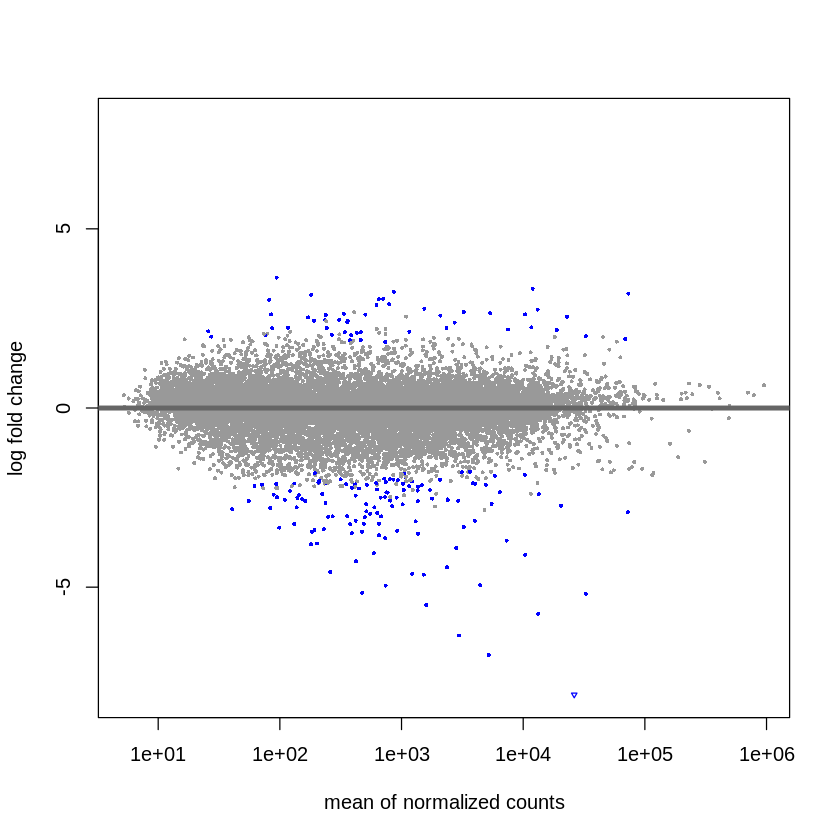

In [34]:
# the function plotMA shows the log2 fold changes attributable to a given variable 
# over the mean of normalized counts for all the samples in the DESeqDataSet. 
# Points will be colored red if the adjusted p value is less than 0.1. 
# Points which fall out of the window are plotted as open triangles pointing either up or down.
 
plotMA(res, ylim = c(-8, 8))

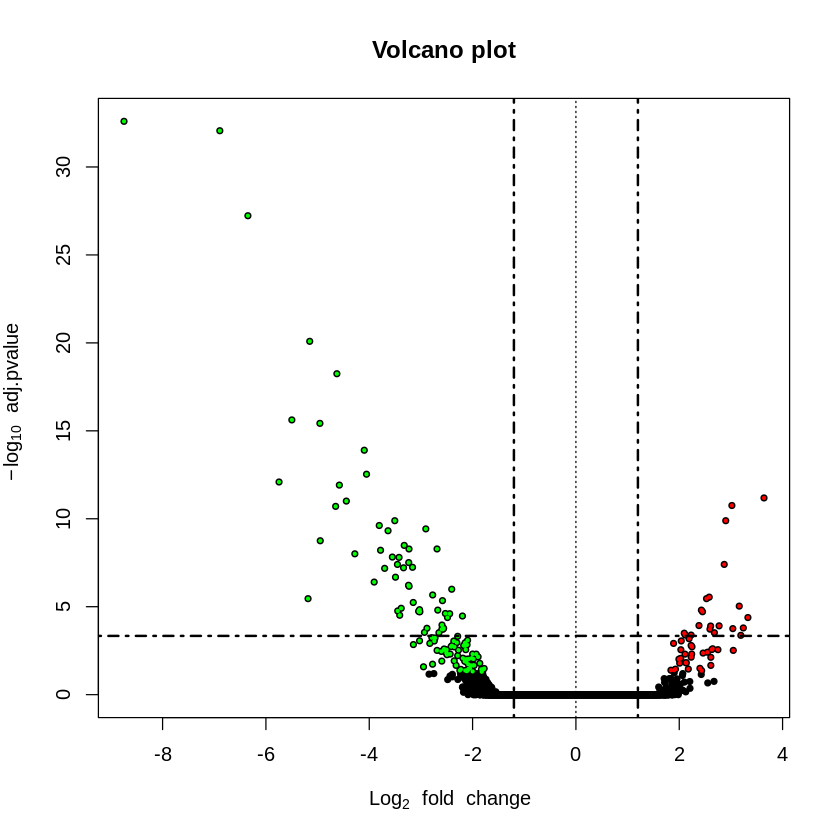

In [35]:
# Volcano Plot
# See https://en.wikipedia.org/wiki/Fold_change

topT <- as.data.frame(res)

#Adjusted P values (FDR Q values)
with(topT, plot(log2FoldChange, -log10(padj), pch=20, main="Volcano plot", cex=1.0, xlab=bquote(~Log[2]~fold~change), ylab=bquote(~-log[10]~adj.pvalue)))
with(subset(topT, padj<=0.05 & log2FoldChange>=1.2), points(log2FoldChange, -log10(padj), pch=20, col="red", cex=0.5))
with(subset(topT, padj<=0.05 & log2FoldChange<= -1.2), points(log2FoldChange, -log10(padj), pch=20, col="green", cex=0.5))

#Add lines for absolute FC>2 and P-value cut-off at FDR Q<0.05
abline(v=0, col="black", lty=3, lwd=1.0)
abline(v=-1.2, col="black", lty=4, lwd=2.0)
abline(v=1.2, col="black", lty=4, lwd=2.0)
abline(h=-log10(max(topT$pvalue[topT$padj<=0.05], na.rm=TRUE)), col="black", lty=4, lwd=2.0)


## PART III
## Co-expression networks

### III.1 Extract the relevant data from the differentially expressed ordered gene seen in II.2

In [36]:
# extract the filtered DEGs

res_save <- subset(resOrdered, padj <= 0.05)
final_dt <- as.data.frame(res_save)

In [37]:
# extract the genes 

genes_passed <- rownames(final_dt)

### III.2 Processing

In [38]:
# filter the two datasets expressed in tumor and normal 

rna_expr_data_C <- rna_expr_data_C[genes_passed, ]
rna_expr_data_N <- rna_expr_data_N[genes_passed, ]

In [39]:
# create the correlation datasets for plotting the network for each graph

co_net_corr_dataC <- cor(t(rna_expr_data_C), method = "pearson")
co_net_corr_dataN <- cor(t(rna_expr_data_N), method = "pearson")

In [40]:
# log-transform FPKM data using log2(x+1) of each count
# See https://www.rna-seqblog.com/rpkm-fpkm-and-tpm-clearly-explained/

rna_expr_data_C <- log2(rna_expr_data_C+1)
rna_expr_data_N <- log2(rna_expr_data_N+1)

In [41]:
# create the correlation datasets for plotting the network for each graph

co_net_corr_dataC <- cor(t(rna_expr_data_C), method = "pearson")
co_net_corr_dataN <- cor(t(rna_expr_data_N), method = "pearson")

### III.3 Plots and Trasholding

In [42]:
distroRho_pearsC <- co_net_corr_dataC[upper.tri(co_net_corr_dataC)]
distroRho_pearsN <- co_net_corr_dataN[upper.tri(co_net_corr_dataN)]

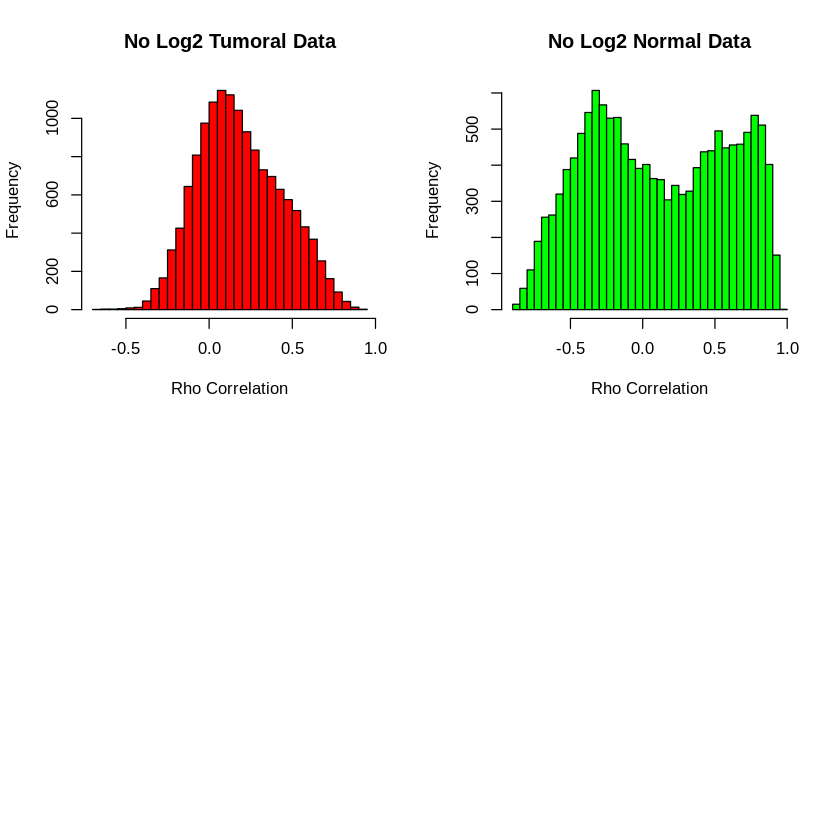

In [43]:
# plot the distribution of the correlations to naively choose a good trashold 

par(mfrow = c(2, 2))
hist(distroRho_pearsC, main = "No Log2 Tumoral Data", col = "red", xlab = "Rho Correlation", breaks = 50)
#points(x = 0.5, y = 0.0, pch = 20, col = "black", cex = 2) # x=0.5 to change accordingly 
hist(distroRho_pearsN, main = "No Log2 Normal Data", col = "green", xlab = "Rho Correlation", breaks = 50)
#points(x = 0.5, y = 0.0, pch = 20, col = "black", cex = 2) # x=0.5 to change accordingly 

In [44]:
# these are probably the threshold candidates 
quantile(abs(distroRho_pearsC))
quantile(abs(distroRho_pearsN))
# Choose trashold = 0.4 as shown below

0%          25%          50%          75%         100% 
3.095782e-05 8.767702e-02 1.950826e-01 3.701449e-01 9.162925e-01

0%          25%          50%          75%         100% 
5.621796e-05 2.186582e-01 4.119146e-01 6.251452e-01 9.522927e-01

### III.4 Fine tuned trasholding

In [45]:
install.packages("igraph")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [46]:
library(igraph)


Attaching package: ‘igraph’


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following object is masked from ‘package:GenomicRanges’:

    union


The following object is masked from ‘package:IRanges’:

    union


The following object is masked from ‘package:S4Vectors’:

    union


The following objects are masked from ‘package:BiocGenerics’:

    normalize, path, union


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




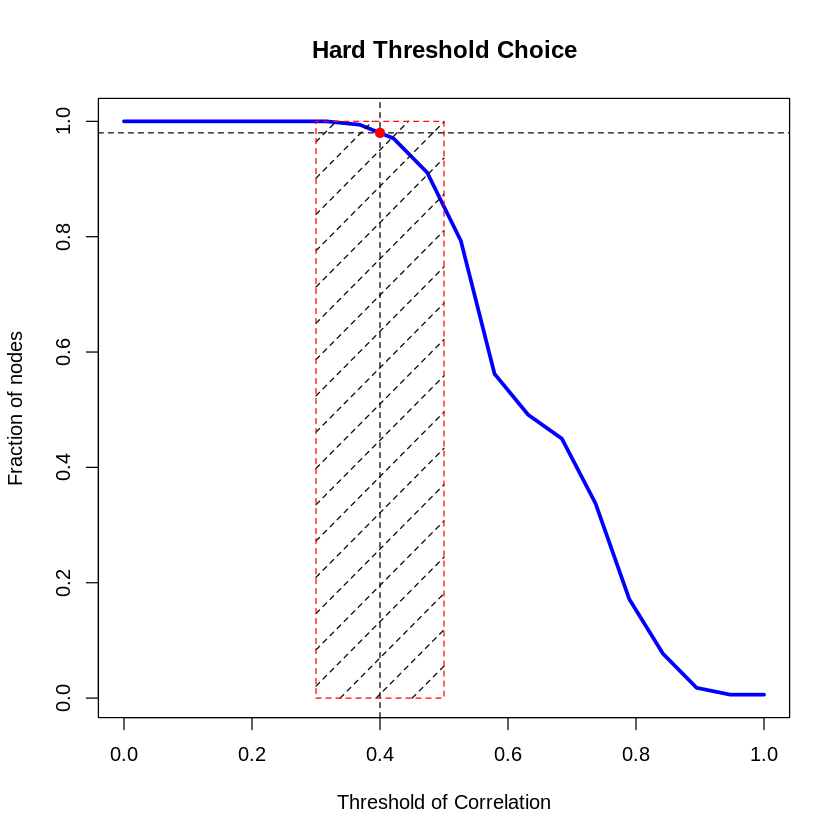

In [47]:
# Find a good threshold 
# Emulate Fiscon lecture (see materials of last year)
# https://classroom.google.com/c/Mjg4MDY4MjkxNDMw

fractionNodes <- function(graph){
  v_graph <- length(V(graph))
  component <- components(graph)
  ind <- which(component$membership == which.max(component$csize))
  LCC <- induced_subgraph(graph , V(graph)[ind])
  v_LCC <- length(V(LCC))
  
  frac_node_LCC <- v_LCC / v_graph
  return(frac_node_LCC)
}

OptimalThresholding <- function(dt, dt2, x){
  # create the correlation datasets for plotting the network for each graph
  co_net_corr_dataC <- cor(t(dt), method = "spearman")
  co_net_corr_dataN <- cor(t(dt2), method = "spearman")
  
  tsh <- x
  co_net_corr_dataC <- ifelse(co_net_corr_dataC <= -abs(tsh) | co_net_corr_dataC >= abs(tsh), 1, 0)
  co_net_corr_dataN <- ifelse(co_net_corr_dataN <= -abs(tsh) | co_net_corr_dataN >= abs(tsh), 1, 0)
  
  gC <- graph_from_adjacency_matrix(co_net_corr_dataC, diag = FALSE)
  gN <- graph_from_adjacency_matrix(co_net_corr_dataN, diag = FALSE)
  
  fracNodes_C <- fractionNodes(gC)
  fracNodes_N <- fractionNodes(gN)
  
  return(mean(fracNodes_C, fracNodes_N))
}

possibletsh <- seq(0, 1, length.out = 20)
densities <- unlist(lapply(possibletsh, function(x){
  return(OptimalThresholding(rna_expr_data_C, rna_expr_data_N, x))
}))

plot(possibletsh, densities, col = "blue", type = "l", lwd = 3, xlab = "Threshold of Correlation", ylab = "Fraction of nodes", main = "Hard Threshold Choice")
rect(xleft = 0.3, ybottom = 0.0, xright = 0.5, ytop = 1.0, density = 5, border = "red", lty = 2, lwd = 1)


abline(h = 0.98, lty=2)
abline(v = 0.4, lty=2)
points(x = 0.4, y = 0.98, pch = 20, col = "red", cex = 1.5) # this is our preferable naive-hard thresholding


### III.4 Hubs of genes

### 1) Graph creation and plots

In [48]:
install.packages("cowplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [49]:
library(cowplot)

In [50]:
# binary masks

tsh <- 0.4 
co_net_corrBinary_dataC <- ifelse(co_net_corr_dataC <= -abs(tsh) | co_net_corr_dataC >= abs(tsh), 1, 0)
co_net_corrBinary_dataN <- ifelse(co_net_corr_dataN <= -abs(tsh) | co_net_corr_dataN >= abs(tsh), 1, 0)

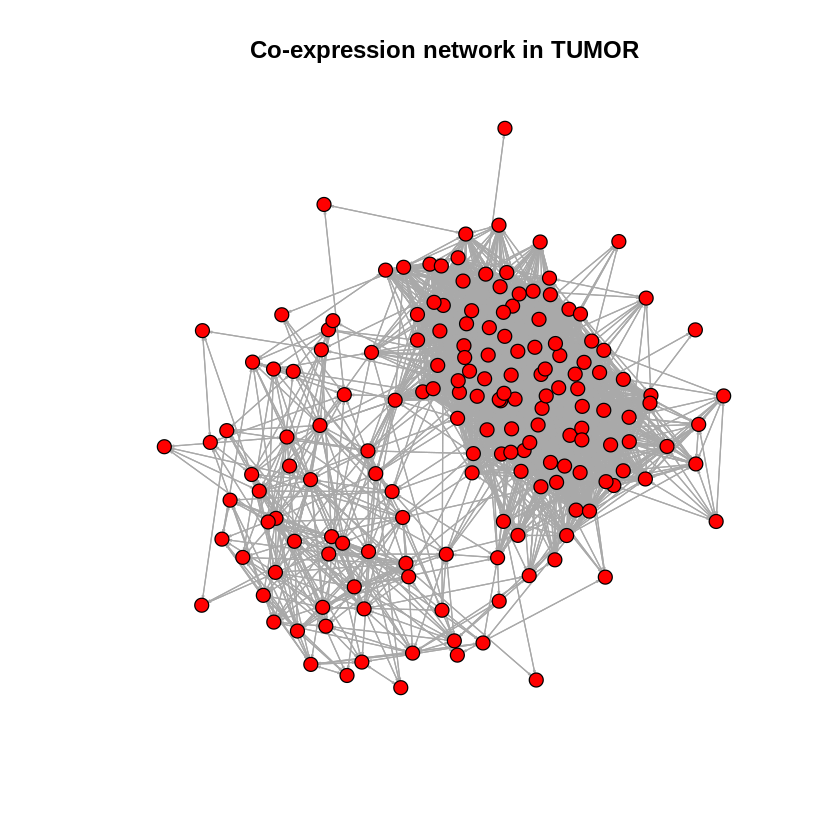

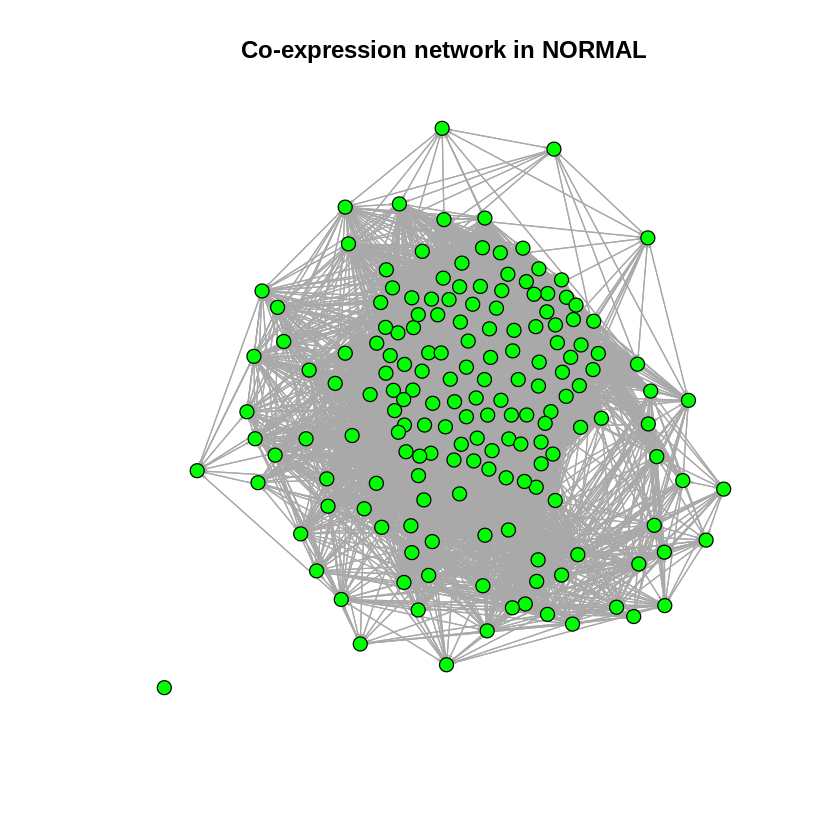

In [51]:
# create the graph

par(mfrow=c(1,1))
gC <- graph_from_adjacency_matrix(co_net_corrBinary_dataC, diag = FALSE)
plot(gC, vertex.size=5, edge.curverd=.1, arrow.size=.1, vertex.color = "red", main = "Co-expression network in TUMOR",
     arrow.width=.1, edge.arrow.size=.1, layout= layout.kamada.kawai, vertex.label = NA) # , vertex.label.dist = .8 and .y, vertex.label.cex=1


gN <- graph_from_adjacency_matrix( co_net_corrBinary_dataN, diag = FALSE)
plot(gN, vertex.size=5, edge.curverd=.1, arrow.size=.1, vertex.color = "green", main = "Co-expression network in NORMAL",
     arrow.width=.1, edge.arrow.size=.1, layout= layout.kamada.kawai, vertex.label = NA) # , vertex.label.dist = .8 and .y, vertex.label.cex=1


### 2) Find the Hubs and plots

In [52]:
# degree distribution of the graphs, extract the 5% of HUBS, in their conditions

par(mfrow=c(1,2))
dgC <- degree(gC)
dgN <- degree(gN)
hubs_C <- sort(degree(gC, v = V(gC), mode = "all"), decreasing = TRUE) # normalized TRUE
hubs_C <- hubs_C[1:floor(0.05 * length(hubs_C))] 
hubs_N <- sort(degree(gN, v = V(gN), mode = "all"), decreasing = TRUE) # normalized TRUE
hubs_N <- hubs_N[1:floor(0.05 * length(hubs_N))] 

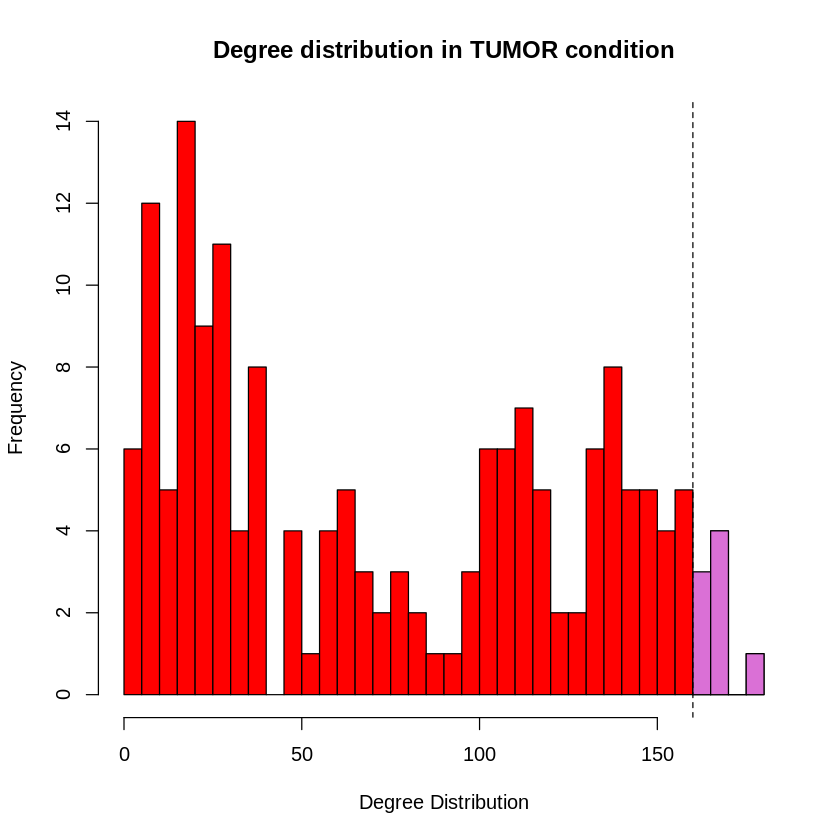

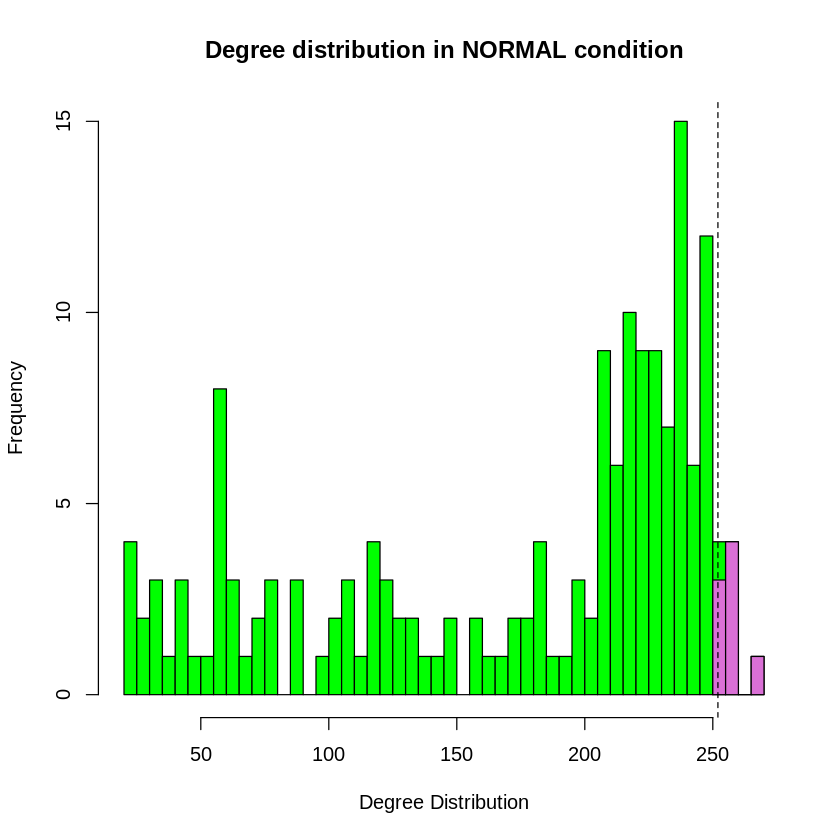

In [53]:
# plot the distribution highliting the 5% of hubs

hist(dgC[dgC != 0], main = "Degree distribution in TUMOR condition", col = "red", xlab = "Degree Distribution", breaks = 50)
hist(hubs_C, add = T, col = "orchid")
abline(v = tail(hubs_C, n=1), lty = 2)
hist(dgN[dgN != 0], main = "Degree distribution in NORMAL condition", col = "green", xlab = "Degree Distribution", breaks = 50)
hist(hubs_N, add = T, col = "orchid")
abline(v = tail(hubs_N, n=1), lty = 2)

In [54]:
# find the hubs 

namesHUBS_C <- names(hubs_C)
namesHUBS_N <- names(hubs_N)

namesHUBS_C_df <- data.frame(gene = namesHUBS_C, degree = hubs_C, row.names = 1:length(namesHUBS_C)); namesHUBS_C_df
namesHUBS_N_df <- data.frame(gene = namesHUBS_N, degree = hubs_N, row.names = 1:length(namesHUBS_N)); namesHUBS_N_df

,gene,degree
,<chr>,<dbl>
1,ENSG00000138356.14,178
2,ENSG00000120885.22,166
3,ENSG00000170915.9,166
4,ENSG00000176928.7,166
5,ENSG00000244509.4,166
6,ENSG00000131620.17,164
7,ENSG00000239713.9,162
8,ENSG00000152137.8,160


,gene,degree
,<chr>,<dbl>
1,ENSG00000260228.6,266
2,ENSG00000211695.2,260
3,ENSG00000119547.6,256
4,ENSG00000136840.19,256
5,ENSG00000125257.16,256
6,ENSG00000176928.7,254
7,ENSG00000103485.19,252
8,ENSG00000255545.8,252


In [55]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ readr   2.1.3
✔ tibble  3.1.7     ✔ purrr   0.3.5
✔ tidyr   1.2.1     ✔ forcats 0.5.2

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tibble::as_data_frame() masks igraph::as_data_frame(), dplyr::as_data_frame()
✖ dplyr::collapse()       masks IRanges::collapse()
✖ dplyr::combine()        masks Biobase::combine(), BiocGenerics::combine()
✖ purrr::compose()        masks igraph::compose()
✖ dplyr::count()          masks matrixStats::count()
✖ tidyr::crossing()       masks igraph::crossing()
✖ dplyr::desc()           masks IRanges::desc()
✖ tidyr::expand()         masks S4Vectors::expand()
✖ dplyr::filter()         masks stats::filter()
✖ dplyr::first()          masks S4Vectors::first()
✖ igraph::groups()        masks dplyr::groups()
✖ dplyr::lag()   

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


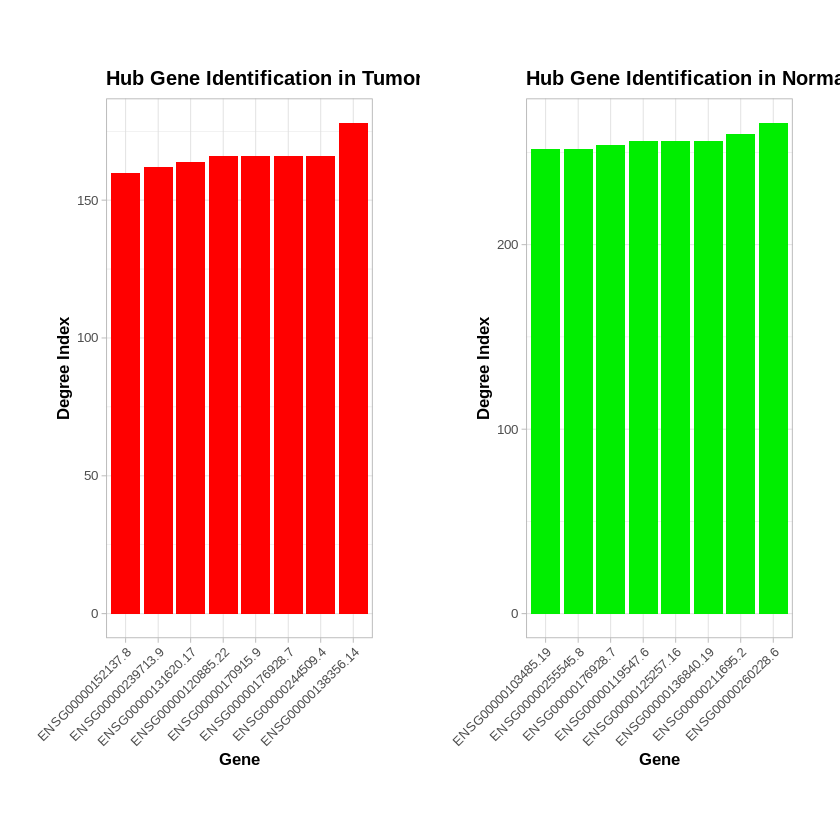

In [56]:
histcol <- c("degree_N" = "green2", "degree" = "red")
hub_gene_C_plot <- ggplot(data = namesHUBS_C_df, aes(x = reorder(gene, degree), y = degree)) +
                      geom_col(aes(x = reorder(gene, degree), y = degree, fill = "degree")) +
                      theme_light() + 
                      theme(text = element_text(size=10),
                            axis.text.x = element_text(angle = 45,hjust = 1),
                            axis.title.x = element_text(face="bold"),
                            axis.title.y = element_text(face="bold"),
                            plot.margin=unit(c(t = 1.5, r = 1, b = 1.5, l = 1.2), "cm"),
                            plot.title = element_text(face = "bold")) +
                      labs( y = "Degree Index", x = "Gene") +
                      scale_fill_manual(values= histcol) +
                      ggtitle("Hub Gene Identification in Tumor Condition") +
                      guides(fill=FALSE)

hub_gene_N_plot <- ggplot(data = namesHUBS_N_df, aes(x = reorder(gene, degree), y = degree)) +
                      geom_col(aes(x = reorder(gene, degree), y = degree, fill = "degree_N")) +
                      theme_light() + 
                      theme(text = element_text(size=10),
                            axis.text.x = element_text(angle = 45,hjust = 1),
                            axis.title.x = element_text(face="bold"),
                            axis.title.y = element_text(face="bold"),
                            plot.margin=unit(c(t = 1.5, r = 1, b = 1.5, l = 1.2), "cm"),
                            plot.title = element_text(face = "bold")) +
                      labs( y = "Degree Index", x = "Gene") +
                      scale_fill_manual(values = histcol) +
                      ggtitle("Hub Gene Identification in Normal Condition") +
                      guides(fill=FALSE)

plot_grid(hub_gene_C_plot, hub_gene_N_plot, labels = NULL)

### 3) Hubs in common (Tumor and Normal)

In [57]:
# Common Hubs

intersect(namesHUBS_C, namesHUBS_N) 

[1] "ENSG00000176928.7"

In [58]:
## ENSG00000176928.7
## A receptor gene involved on bring much signals and get two-way communication answers with other gene...
## Check the closeness to confirm

sort(closeness(gC), decreasing = T)[1] 

ENSG00000120885.22 
       0.003636364

### 4) Extra Statistics about Hubs

In [59]:
# # Up-regulated  (Tumor)
upgenes <- final_dt[final_dt$log2FoldChange >= 1.2, ]
hub_upgenes <- na.omit(upgenes[namesHUBS_C, ]) # empty 

# Down-regulated (Tumor)
downgenes <- final_dt[final_dt$log2FoldChange <= 1.2, ]
hub_downgenes <- na.omit(downgenes[namesHUBS_C, ])

# Up-regulated (Normal)
upgenes_N <- final_dt[final_dt$log2FoldChange >= 1.2, ]
hub_upgenes_N <- na.omit(upgenes_N[namesHUBS_N, ])

# # Down-regulated (Normal)
downgenes_N <- final_dt[final_dt$log2FoldChange <= 1.2, ]
hub_downgenes_N <- na.omit(downgenes_N[namesHUBS_N, ])

# e.g
hub_downgenes

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000138356.14,3851.1110,-2.096393,0.1937480,-4.626591,3.717335e-06,8.085647e-04
ENSG00000120885.22,72647.6598,-2.905137,0.2349149,-7.258528,3.913241e-13,3.763096e-10
ENSG00000170915.9,1785.4053,-2.527077,0.2466518,-5.380366,7.433438e-08,2.425292e-05
ENSG00000176928.7,350.6204,-2.129471,0.2081403,-4.465600,7.984480e-06,1.535626e-03
ENSG00000244509.4,3649.8892,-1.776065,0.1583478,-3.637975,2.747905e-04,3.260193e-02
ENSG00000131620.17,5496.8218,-2.673804,0.2689698,-5.479442,4.266703e-08,1.559139e-05
ENSG00000239713.9,930.1250,-2.016160,0.2033592,-4.013392,5.985243e-05,8.420090e-03
ENSG00000152137.8,10286.8084,-1.860382,0.1725229,-3.827792,1.292978e-04,1.652028e-02


## PART IV 
## Differential Co-expressed Network

### IV.1 Find the optimal Z-treshold
See III.4 as a reference for this part

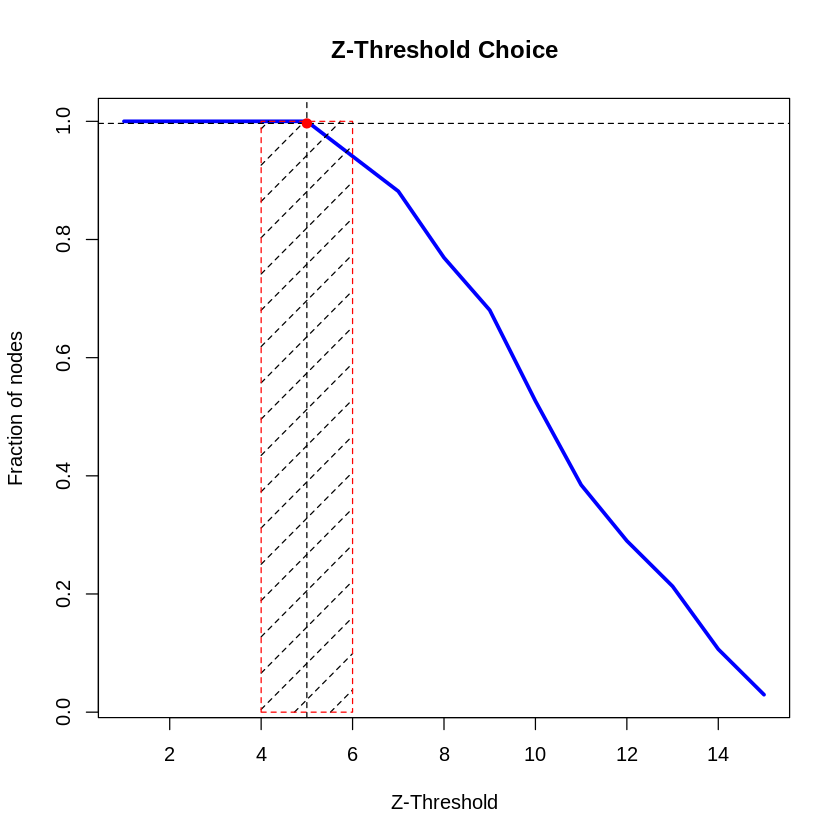

In [60]:
OptimalThresholdingZ <- function(dt, dt2, x){
  # create the correlation datasets for plotting the network for each graph
  co_net_corr_dataC <- cor(t(dt), method = "pearson")
  co_net_corr_dataN <- cor(t(dt2), method = "pearson")
  
  # Application Z-Fisher Transform
  ZcoDataC <- log((1+co_net_corr_dataC)/(1-co_net_corr_dataC))/2
  ZcoDataN <- log((1+co_net_corr_dataN)/(1-co_net_corr_dataN))/2
  
  # Applying z-scores
  ZcoData <- (ZcoDataC-ZcoDataN)/sqrt((1/(nrow(rna_expr_data_C)-3)) + (1/(nrow(rna_expr_data_N)-3)))
  
  # Applying Z-tsh
  tshZ <- x
  ZcoData <- ifelse(ZcoData <= -abs(tshZ) | ZcoData >= abs(tshZ), 1, 0)
  
  gZ <- graph_from_adjacency_matrix(ZcoData, diag = FALSE)
  
  fracNodes_C <- fractionNodes(gZ)
  
  return(fracNodes_C)
}

possibletshZ <- seq(1, 15, by = 1) # the behaviour is symmetric
densitiesZ <- unlist(lapply(possibletshZ, function(x){
  return(OptimalThresholdingZ(rna_expr_data_C, rna_expr_data_N, x))
}))

plot(possibletshZ, densitiesZ, col = "blue", type = "l", lwd = 3, xlab = "Z-Threshold", ylab = "Fraction of nodes", main = "Z-Threshold Choice")
rect(xleft = 4, ybottom = 0.0, xright = 6, ytop = 1.0, density = 5, border = "red", lty = 2, lwd = 1)

# hard Zthresholding
abline(h = 0.9965, lty=2)
abline(v = 5, lty=2)
points(x = 5, y = 0.9965, pch = 20, col = "red", cex = 1.5)

### IV.2 Correlation and Z-Transform

In [61]:
# create the correlation datasets for plotting the network for each graph
co_net_corr_dataC <- cor(t(rna_expr_data_C), method = "pearson")
co_net_corr_dataN <- cor(t(rna_expr_data_N), method = "pearson")

# Application Z-Fisher Transform
ZcoDataC <- log((1+co_net_corr_dataC)/(1-co_net_corr_dataC))/2
ZcoDataN <- log((1+co_net_corr_dataN)/(1-co_net_corr_dataN))/2

# Applying z-scores
ZcoData <- (ZcoDataC-ZcoDataN)/sqrt((1/(nrow(rna_expr_data_C)-3)) + (1/(nrow(rna_expr_data_N)-3)))

# Z-Threshold it
tshZ <- 5 
ZcoData <- ifelse(ZcoData <= -abs(tshZ) | ZcoData >= abs(tshZ), 1, 0)

### IV.3 Hubs of genes
See III.4 as a reference for this part

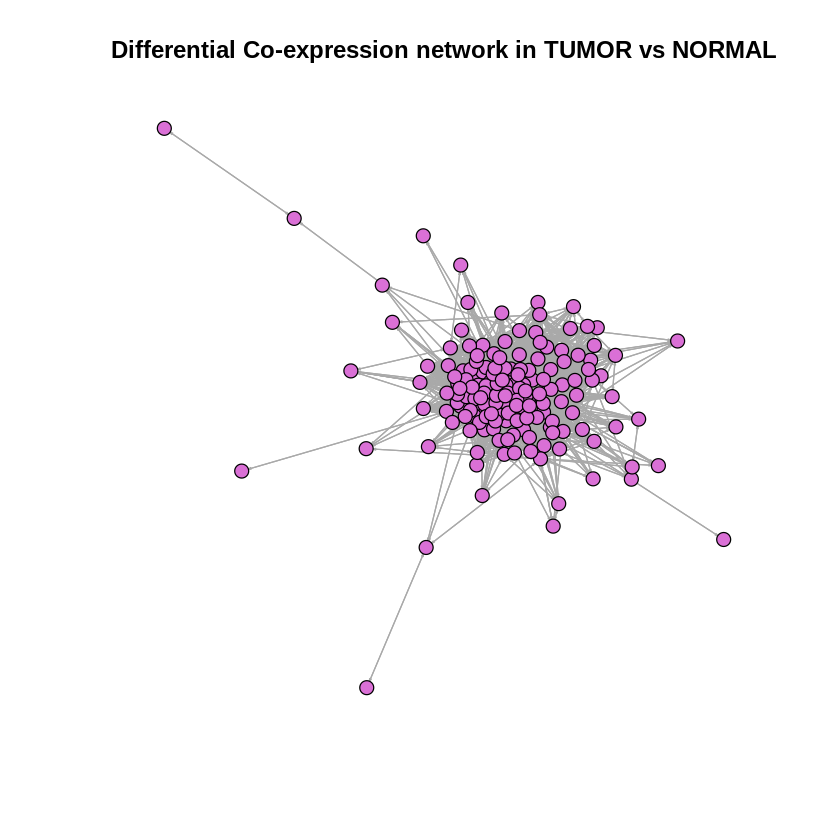

character(0)


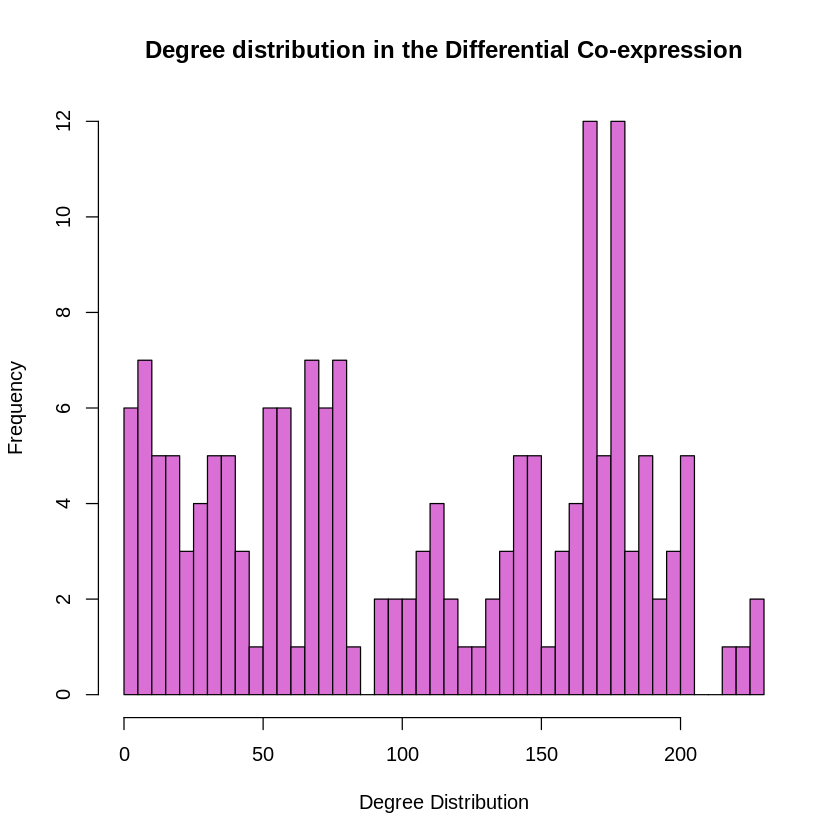

In [62]:
# Get the graph and plot it
gZcoData <- graph_from_adjacency_matrix( ZcoData, diag = FALSE)
plot(gZcoData, vertex.size=5, edge.curverd=.1, arrow.size=.1, vertex.color = "orchid", main = "Differential Co-expression network in TUMOR vs NORMAL",
     arrow.width=.1, edge.arrow.size=.1, layout= layout.auto, vertex.label = NA)

# dgZcoData degree distribution
dgZcoData <- degree(gZcoData)
hist(dgZcoData[dgZcoData != 0], main = "Degree distribution in the Differential Co-expression", col = "orchid", xlab = "Degree Distribution", breaks = 50)

# extract the 5% of HUBS, in their conditions
hubs_Z <- sort(degree(gZcoData, v = V(gZcoData), mode = "all"), decreasing = TRUE) # normalized TRUE
hubs_Z <- hubs_Z[1:floor(0.05 * length(hubs_Z))] 

# Comparing hubs in TUMORS and Z-Tum vs. Z-Norm
namesHUBS_Z <- names(hubs_Z)
namesHUBS_C <- names(hubs_C)
namesHUBS_N <- names(hubs_N)

hubs_commonZC <- intersect(namesHUBS_C, namesHUBS_Z) 
print(hubs_commonZC)

## Part V
## Patient Similarity Network (PSN)

In [77]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("netDx")

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.16 (BiocManager 1.30.19), R 4.2.2 (2022-10-31)

Installing package(s) 'netDx'

also installing the dependencies ‘gtools’, ‘caTools’, ‘gplots’, ‘shape’, ‘RcppEigen’, ‘BiocBaseUtils’, ‘bigmemory.sri’, ‘iterators’, ‘ROCR’, ‘pracma’, ‘glmnet’, ‘reshape2’, ‘MultiAssayExperiment’, ‘bigmemory’, ‘doParallel’, ‘foreach’, ‘combinat’, ‘Rtsne’, ‘plotrix’


Old packages: 'devtools', 'evaluate', 'ggplot2', 'lubridate', 'modelr',
  'rmarkdown', 'roxygen2', 'tibble', 'tidyverse', 'foreign', 'Matrix'



In [65]:
#?

In [66]:
#?

In [67]:
#?

In [68]:
#?

In [69]:
#?

## PART VI
## Optional Tasks

### V.1 Check the overlapping between the 5% of the nodes with highest CI values and the "Degree"-based hubs

In [70]:
comparisonCIwithDegreeHUBS <- function(graph, TypegHUBS) {
  
  # calculates the centralities
  CI_index_between <- sort(betweenness(graph), decreasing = T) # Betweenness centrality
  CI_index_closeness <- sort(closeness(graph), decreasing = T) # Closeness centrality
  CI_index_eigen <- sort(eigen_centrality(graph)$vector, decreasing = T) # Eigen centrality
  
  # extract the hubs
  hubs_CI_between <- CI_index_between[1:floor(0.05 * length(CI_index_between))] # Find the Hubs (top 5%)
  namesHUBS_CI_between <- names(hubs_CI_between) # and their names
  
  hubs_CI_closeness <- CI_index_closeness[1:floor(0.05 * length(CI_index_closeness))] # Find the Hubs (top 5%)
  namesHUBS_CI_closeness <- names(hubs_CI_closeness) # and their names
  
  hubs_CI_eigen <- CI_index_eigen[1:floor(0.05 * length(CI_index_eigen))] # Find the Hubs (top 5%)
  namesHUBS_CI_eigen <- names(hubs_CI_eigen) # and their names
  
  # put all in a list
  localCentralities <- list(
    betweeness = intersect(TypegHUBS, namesHUBS_CI_between),
    closeness = intersect(TypegHUBS, namesHUBS_CI_closeness),
    eigen = intersect(TypegHUBS, namesHUBS_CI_eigen)
  )
  
  return(localCentralities) #Let's see which centralityIndex-based hubs are also "Degree"-based hubs
}

plotCommonHUBS <- function(matrix_type, graph_type, LocalCentralities_type){ # to be complete!!
  
  for(hubs_type in names(LocalCentralities_type)){
    hub_common <- LocalCentralities_type[[hubs_type]]
    
    V(graph_type)$color <- ifelse(V(graph_type)$name %in% hub_common, "red", "green")
    
    plot(graph_type, vertex.size=5, edge.curverd=.1, arrow.size=.1, vertex.color = V(graph_type)$color, main = paste(hubs_type, "=", length(hub_common), "hubs in common", sep = " "),
         arrow.width=.1, edge.arrow.size=.1, layout= layout_on_sphere, vertex.label = NA)
  }
  
}

$betweeness
[1] "ENSG00000120885.22" "ENSG00000239713.9" 

$closeness
[1] "ENSG00000138356.14" "ENSG00000120885.22" "ENSG00000170915.9" 
[4] "ENSG00000131620.17" "ENSG00000239713.9" 

$eigen
[1] "ENSG00000138356.14" "ENSG00000120885.22" "ENSG00000170915.9" 
[4] "ENSG00000176928.7"  "ENSG00000244509.4"  "ENSG00000131620.17"

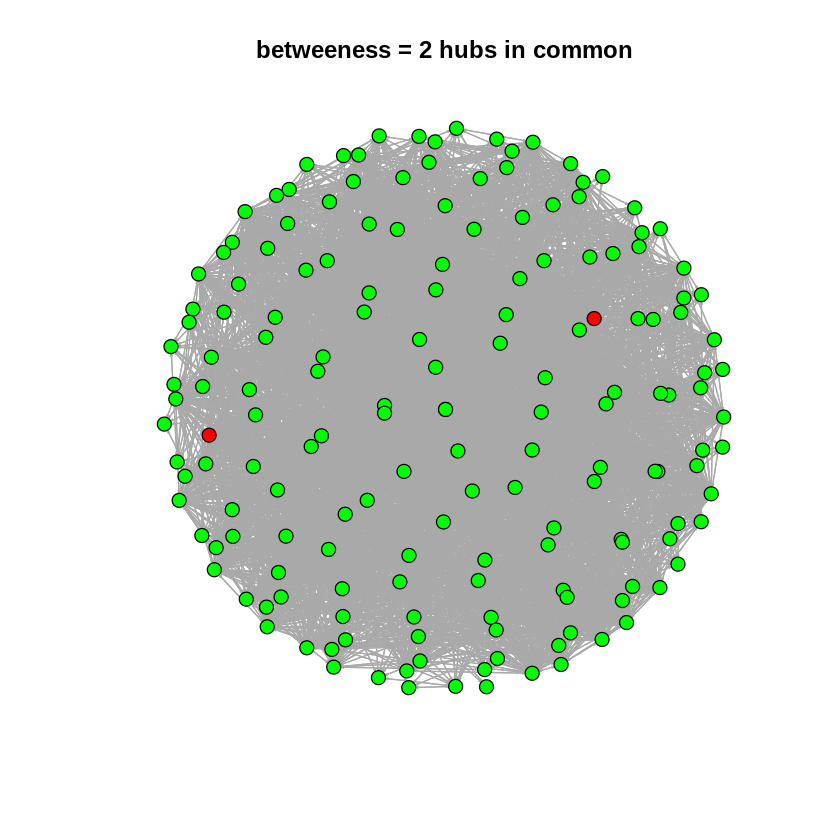

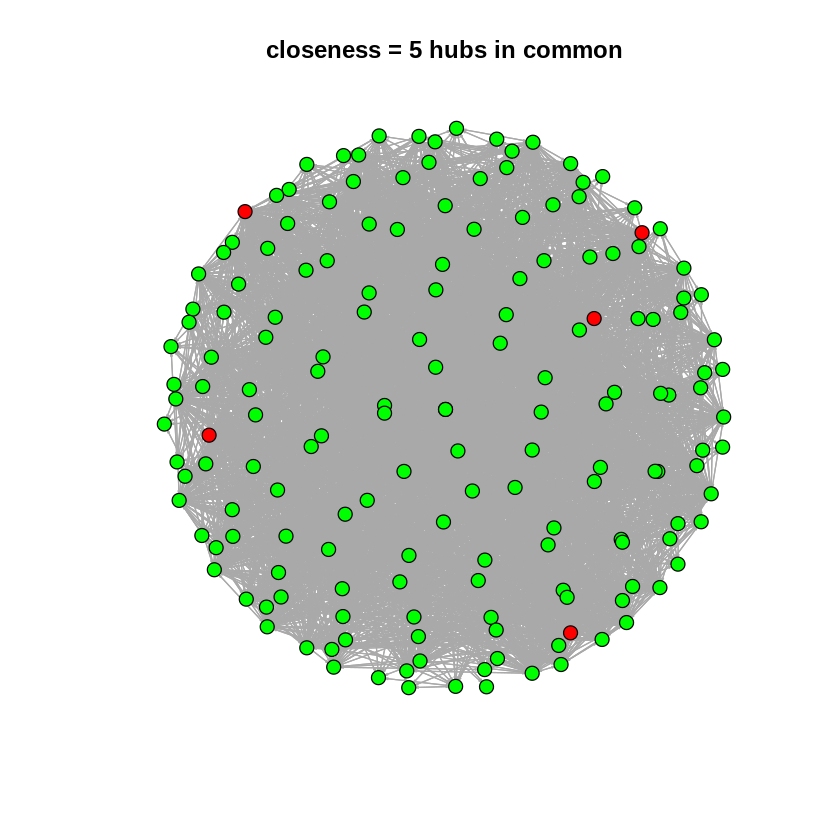

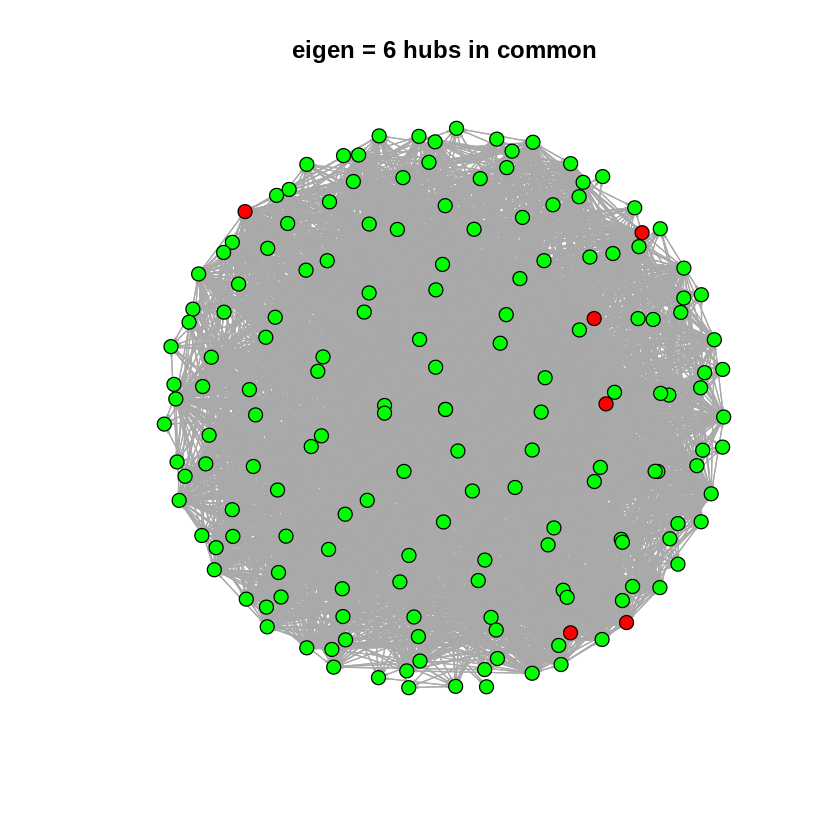

In [71]:
# Centralities and common hubs (Tumor)
LocalCentralities_C <- comparisonCIwithDegreeHUBS(gC, namesHUBS_C); LocalCentralities_C 
plotCommonHUBS(co_net_corrBinary_dataC, gC, LocalCentralities_C) 

$betweeness
[1] "ENSG00000260228.6" "ENSG00000255545.8"

$closeness
[1] "ENSG00000260228.6"  "ENSG00000211695.2"  "ENSG00000119547.6" 
[4] "ENSG00000136840.19" "ENSG00000125257.16" "ENSG00000176928.7" 
[7] "ENSG00000103485.19" "ENSG00000255545.8" 

$eigen
[1] "ENSG00000260228.6"  "ENSG00000211695.2"  "ENSG00000136840.19"
[4] "ENSG00000125257.16" "ENSG00000103485.19"

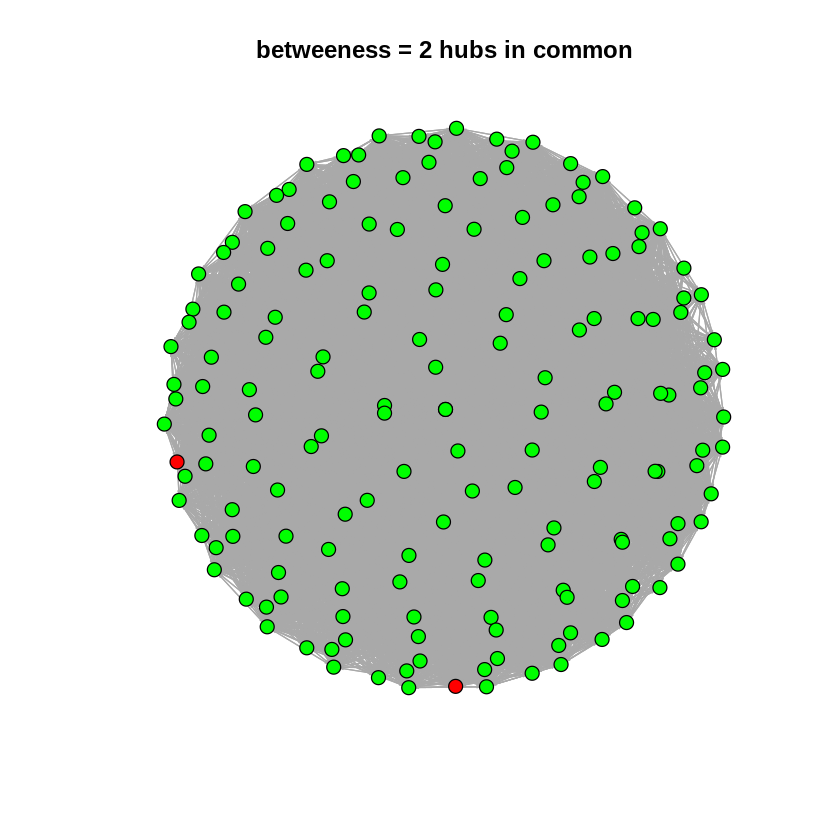

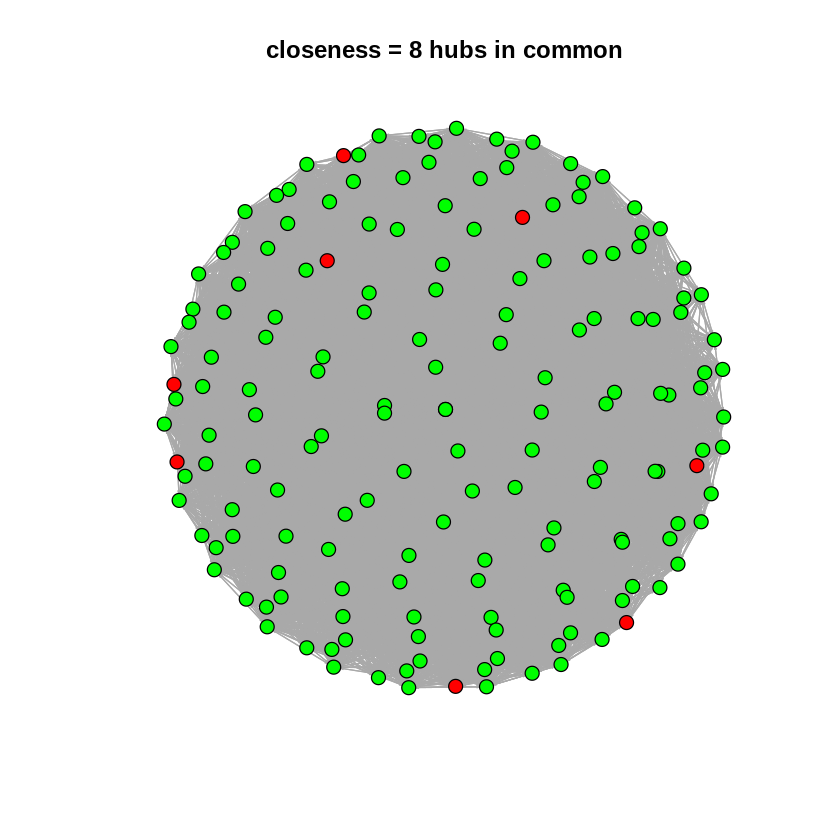

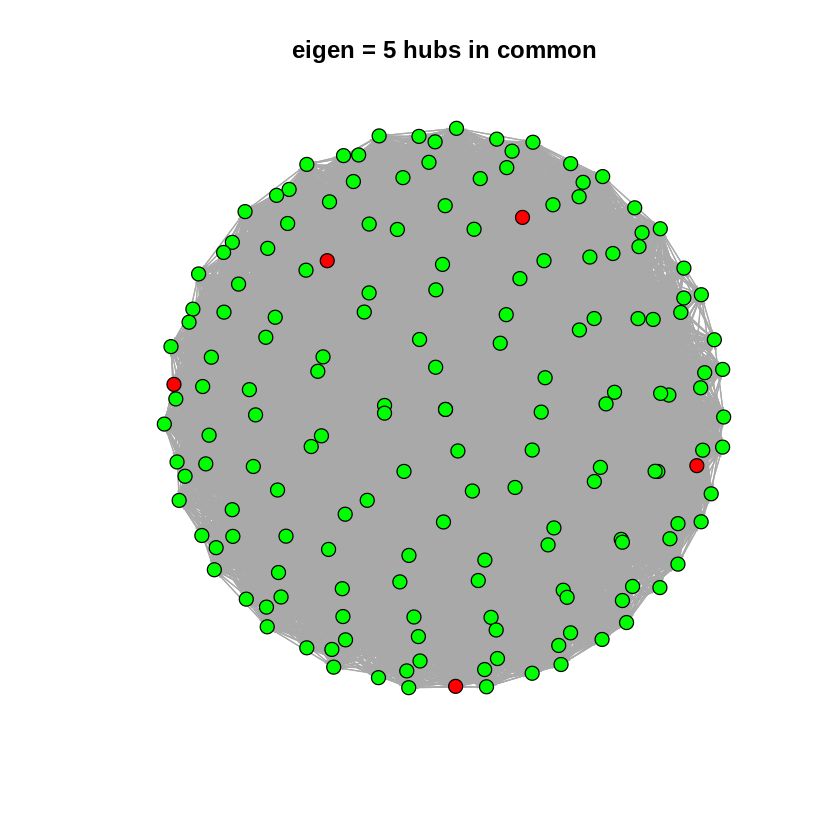

In [72]:
# Centralities and common hubs (Normal)
LocalCentralities_N <- comparisonCIwithDegreeHUBS(gN, namesHUBS_N); LocalCentralities_N 
plotCommonHUBS(co_net_corrBinary_dataN, gN, LocalCentralities_N) 

### VI.2 Perform the study using a different similarity measure

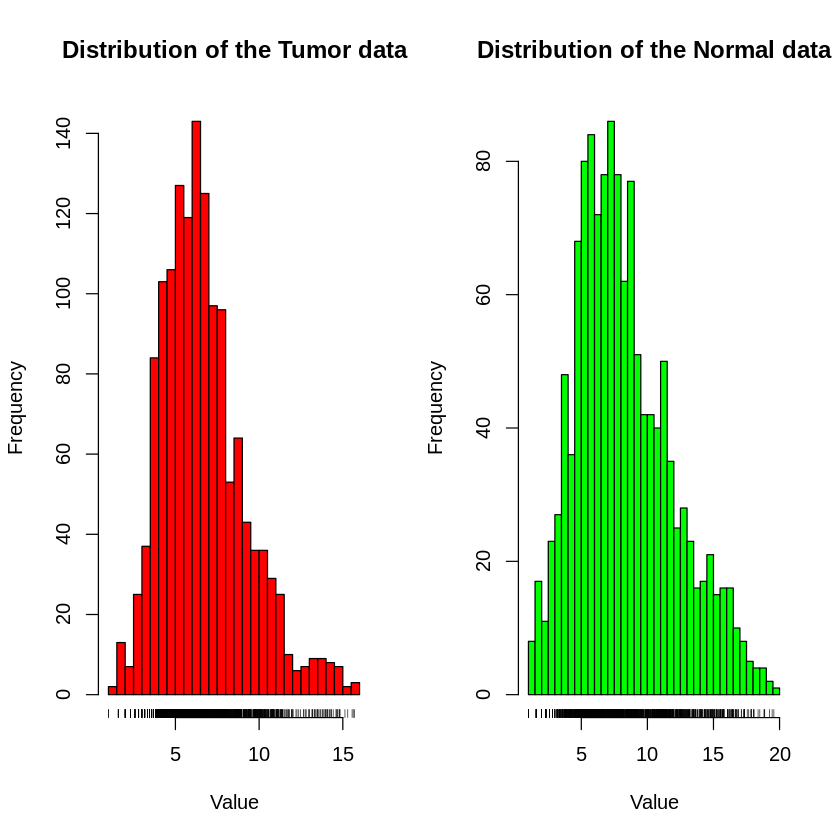

In [73]:
# Print the values to check which value of correlation is better
par(mfrow=c(1,2))
hist(rna_expr_data_C[upper.tri(rna_expr_data_C)], main = "Distribution of the Tumor data", col = "red", xlab = "Value", breaks = 50)
rug(rna_expr_data_C[upper.tri(rna_expr_data_C)])
hist(rna_expr_data_N[upper.tri(rna_expr_data_N)], main = "Distribution of the Normal data", col = "green", xlab = "Value", breaks = 50)
rug(rna_expr_data_N[upper.tri(rna_expr_data_N)])

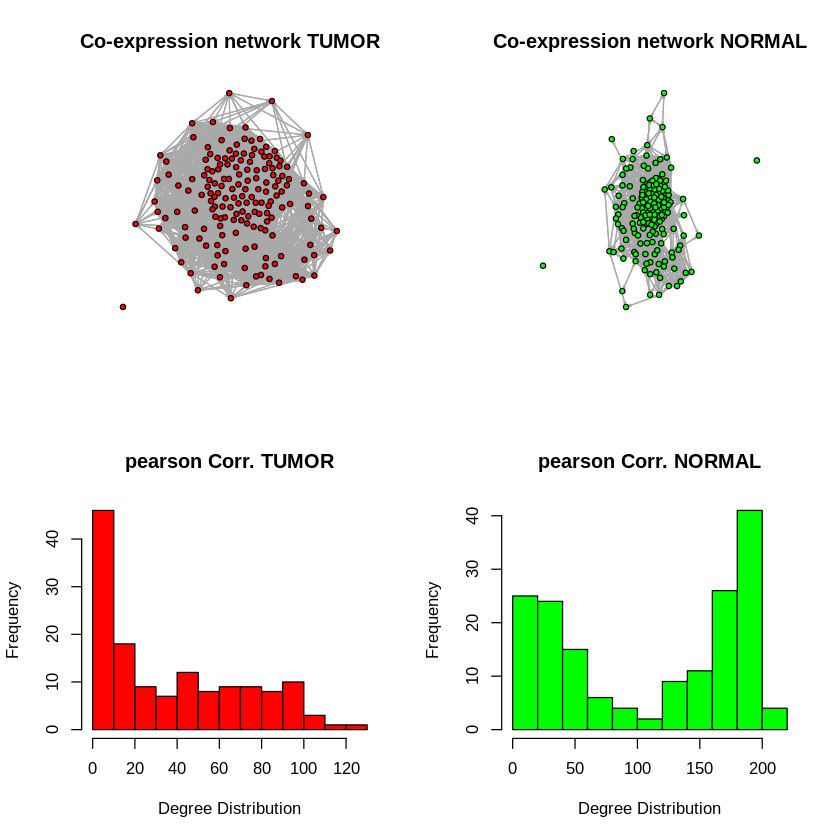

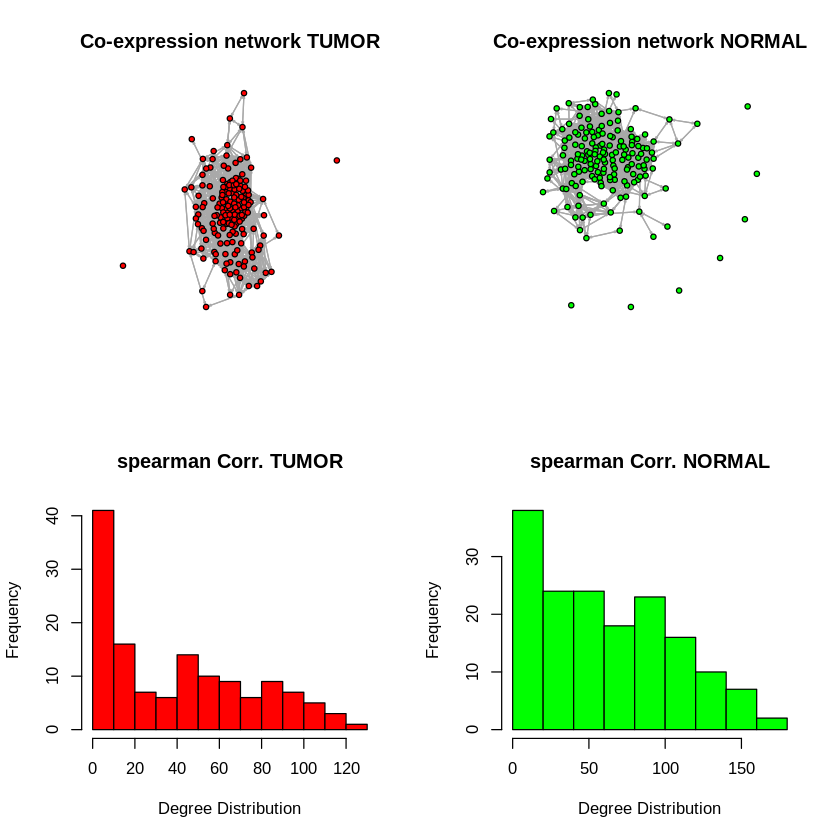

In [74]:
par(mfrow=c(2,2))
method_correlation <- c("pearson", "spearman")
for (i in  method_correlation) {
  # create the correlation datasets for plotting the network for each graph
  co_net_corr_dataC <- cor(t(rna_expr_data_C), method = i)
  co_net_corr_dataN <- cor(t(rna_expr_data_N), method = i)
  
  # binary masks
  tsh <- 0.55
  co_net_corrBinary_dataC <- ifelse(co_net_corr_dataC <= -abs(tsh) | co_net_corr_dataC >= abs(tsh), 1, 0)
  co_net_corrBinary_dataN <- ifelse(co_net_corr_dataN <= -abs(tsh) | co_net_corr_dataN >= abs(tsh), 1, 0)
  
  # create the graph
  gC <- graph_from_adjacency_matrix(co_net_corrBinary_dataC, diag = FALSE)
  plot(gN, vertex.size=5, edge.curverd=.1, arrow.size=.1, vertex.color = "RED", main = "Co-expression network TUMOR",
       arrow.width=.1, edge.arrow.size=.1, layout= layout.kamada.kawai, vertex.label = NA)
  
  
  gN <- graph_from_adjacency_matrix( co_net_corrBinary_dataN, diag = FALSE)
  plot(gN, vertex.size=5, edge.curverd=.1, arrow.size=.1, vertex.color = "green", main = "Co-expression network NORMAL",
       arrow.width=.1, edge.arrow.size=.1, layout= layout.kamada.kawai, vertex.label = NA) 
  
  # degree distribution of the graphs
  dgC <- degree(gC)
  dgN <- degree(gN)
  hist(dgC[dgC != 0], main = paste(i, "Corr. TUMOR", sep = " ") , col = "red", xlab = "Degree Distribution")
  hist(dgN[dgN != 0], main = paste(i, "Corr. NORMAL", sep = " "), col = "green", xlab = "Degree Distribution")
  
  # extract the 5% of HUBS, in their conditions
  hubs_C <- sort(degree(gC, v = V(gC), mode = "all"), decreasing = TRUE) # normalized TRUE
  hubs_C <- hubs_C[1:floor(0.05 * length(hubs_C))] 
  hubs_N <- sort(degree(gN, v = V(gN), mode = "all"), decreasing = TRUE) # normalized TRUE
  hubs_N <- hubs_N[1:floor(0.05 * length(hubs_N))] 
  
  nam <- paste("hubs_C_", i, sep = "")
  assign(nam, names(hubs_C))
  mamt <- paste("hubs_N_", i, sep = "")
  assign(mamt, names(hubs_N))
}

In [75]:
# common hubs

intersect(hubs_N_pearson, hubs_N_spearman) 
intersect(hubs_C_pearson, hubs_C_spearman) 

[1] "ENSG00000136840.19" "ENSG00000170915.9"  "ENSG00000120885.22"
[4] "ENSG00000135253.15"

[1] "ENSG00000244509.4"  "ENSG00000128266.9"  "ENSG00000103485.19"
[4] "ENSG00000170915.9"  "ENSG00000138356.14" "ENSG00000120885.22"
[7] "ENSG00000131620.17"